## Билет 8 : 

---
- **RUDN UNiversity : НПМмд-01-19**

- **Student : Мухамаду Хади Диалло**

- **Teacher : Светлана Г.**

----


In [19]:
# modules used 
import os 
import pandas as pd
import numpy as np
from math import pi, cos, sin
from scipy import misc 
from scipy.integrate import quad
import matplotlib.pyplot as plt

### 1_1 Библиотека Pandas

**Pandas** это высокоуровневая **Python** библиотека для анализа данных.

### 1_2 Операции над данными

<img src="panda_operation.PNG">

### 1_3 выборка данных

Чтобы эффективно работать с **pandas**, необходимо освоить *самые главные структуры данных библиотеки*: **DataFrame и Series**. Без понимания что они из себя представляют, невозможно в дальнейшем проводить качественный анализ.

**Series** :
Структура/объект Series представляет из себя объект, похожий на одномерный массив (питоновский список, например) 

In [24]:
my_series = pd.Series([5, 6, 7, 8, 9, 10])
my_series

0     5
1     6
2     7
3     8
4     9
5    10
dtype: int64

In [25]:
my_series.index

RangeIndex(start=0, stop=6, step=1)

**DataFrame** : 
Объект DataFrame лучше всего представлять себе в виде обычной таблицы и это правильно, ведь DataFrame является табличной структурой данных. 
(*пример приведен в последней части*)

## 2.Вывести графикифункциии её производной $f(x)$. Найти значение интегралана отрезке $[0;\pi/3]$.
$f(x)=(\cos{x})^3\sin{2x}$

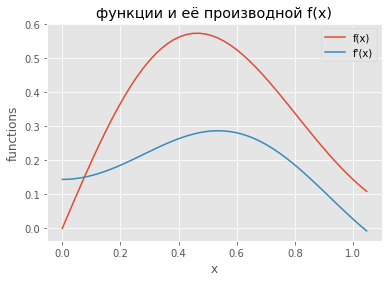

In [35]:
# calcul 
N=50
x=np.linspace(0,pi/3,N)

# fonction f
def f(x):
    return sin(2*x)*(cos(x))**3

# derivation approx 
def diff(t):
    diff_f=np.zeros(N)
    for i in range(N-1):
        diff_f[i]=(f[i+1] - f[i])/(x[i+1] - x[i])
    diff_f[N-1]=diff_f[N-2]
    return diff_f

f_x=np.zeros(len(x))
ff_x=np.zeros(len(x))
fff_x=np.zeros(len(x))

for i in range(len(x)):
    f_x[i]=f(x[i])
    ff_x[i]=misc.derivative(f, x[i])
    #fff_x[i]=diff(x[i])

fig, ax = plt.subplots()
ax.plot(x,f_x, label='f(x)')
ax.plot(x,ff_x, label="f'(x)")
#ax.plot(x,fff_x, label="f'(x)_approx")
ax.set_xlabel("x")
ax.set_ylabel("functions")
ax.set_title("функции и её производной f(x)")
ax.legend()

### Найти значение интегралана отрезке  [0;𝜋/3] 

$t=\int_{0}^{\pi/3} f(x) dx$

No handles with labels found to put in legend.


значение интегралана отрезке [0;𝜋/3] : 
Numerical approximation =  0.3862409422396356
Exact value = 0.3862409422396356


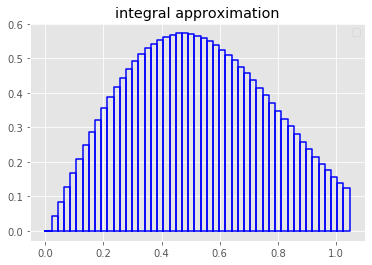

In [43]:
# Numerical integration 
xmin = 0
xmax = pi/3
nbx = N
nbi = nbx - 1 # number interval

x = np.linspace(xmin, xmax, nbx)
y = f_x

integrale = 0
for i in range(nbi):
    integrale = integrale + y[i]*(x[i+1]-x[i])
    # dessin du rectangle
    x_rect = [x[i], x[i], x[i+1], x[i+1], x[i]] # X вершин
    y_rect = [0   , y[i], y[i]  , 0     , 0   ] # Y X вершин
    plt.plot(x_rect, y_rect,"b")
    plt.title("integral approximation")
# Exact value
t = quad(f,0,pi/3)[0]

print("значение интегралана отрезке [0;𝜋/3] : ")
print("Numerical approximation = ",integrale)
print("Exact value =", integrale)

plt.legend()
plt.show()

## 3 Прочитать  файл  данных.  Построить  зависимости. Построитьгистограммы.search_engine-RU-monthly-201902-202002.csv

### 3_1 Прочитать  файл  данных.

In [2]:
# Importing data 
file_name="search_engine-RU-monthly-201902-202002.csv"

with open(file_name, 'r') as f:
     data_engine=pd.read_csv(file_name)

print("*search_engine-RU-monthly-201902-202002.csv*")
print("data shape :", np.shape(data_engine))
print(data_engine.iloc[:5,:5])


*search_engine-RU-monthly-201902-202002.csv*
data shape : (13, 11)
      Date  Google  YANDEX RU  Mail.ru  bing
0  2019-02   45.94      50.27     2.59  0.36
1  2019-03   45.73      50.38     2.65  0.36
2  2019-04   45.45      50.75     2.42  0.45
3  2019-05   46.38      50.11     2.16  0.48
4  2019-06   46.95      49.39     2.28  0.51


In [3]:
# As panda
dataComp=pd.DataFrame(data_engine)
# add column
c=['feb19','mar19','apr19','may19','jun19','jul19','aug19','sep19','oct19','nov19','dec19','jan20','feb20']
dataComp['Month']=c
del dataComp['Date']
for i in c:
    dataComp.index = c
dataComp

,Google,YANDEX RU,Mail.ru,bing,Yahoo!,DuckDuckGo,Baidu,YANDEX,MSN,Other,Month
feb19,45.94,50.27,2.59,0.36,0.39,0.20,0.14,0.03,0.05,0.02,feb19
mar19,45.73,50.38,2.65,0.36,0.36,0.22,0.16,0.05,0.05,0.03,mar19
apr19,45.45,50.75,2.42,0.45,0.40,0.24,0.16,0.03,0.06,0.03,apr19
may19,46.38,50.11,2.16,0.48,0.37,0.24,0.15,0.03,0.04,0.03,may19
jun19,46.95,49.39,2.28,0.51,0.38,0.23,0.15,0.04,0.04,0.03,jun19
jul19,47.88,48.79,2.06,0.38,0.37,0.23,0.17,0.05,0.03,0.04,jul19
aug19,51.65,45.16,2.14,0.29,0.29,0.25,0.08,0.05,0.03,0.05,aug19
sep19,53.46,43.01,2.45,0.34,0.27,0.24,0.09,0.05,0.04,0.04,sep19
oct19,51.96,44.33,2.49,0.48,0.31,0.23,0.09,0.05,0.01,0.05,oct19
nov19,51.68,44.88,2.37,0.42,0.24,0.24,0.07,0.04,0.01,0.04,nov19


### 3_2 Построить  зависимости.

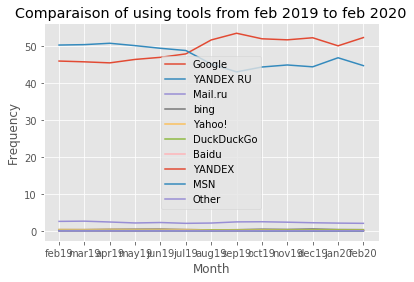

In [22]:
col=['Google','YANDEX RU','Mail.ru','bing','Yahoo!','DuckDuckGo','Baidu','YANDEX','MSN','Other']
fig, ax = plt.subplots()
for engine in col : 
    ax.plot(dataComp['Month'],dataComp[engine], label=engine)
    ax.set_xlabel("Month")
    ax.set_ylabel("Frequency")
    ax.set_title("Comparaison of using tools from feb 2019 to feb 2020")
    ax.legend()

def graph(engine) :
    for engine in col : 
        fig, ax = plt.subplots()
        ax.grid
        ax.plot(dataComp['Month'],dataComp[engine],'r', label=engine)
        ax.set_xlabel("Month")
        ax.set_ylabel("Frequency")
        ax.set_title("Comparaison of using tools from feb 2019 to feb 2020")
        ax.legend()

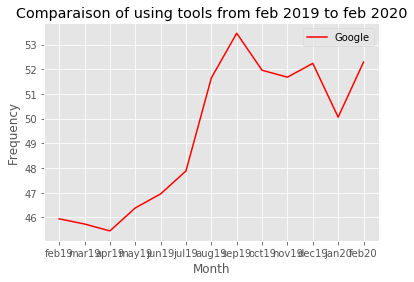

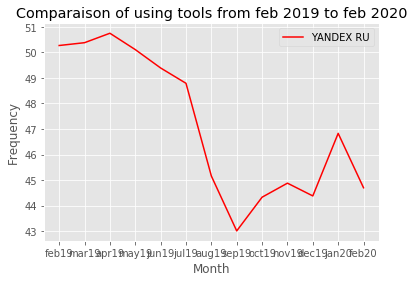

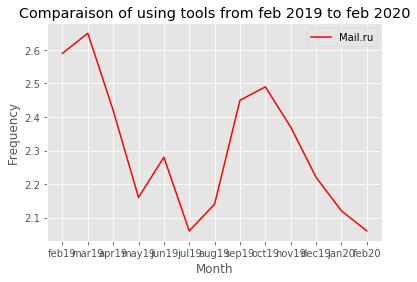

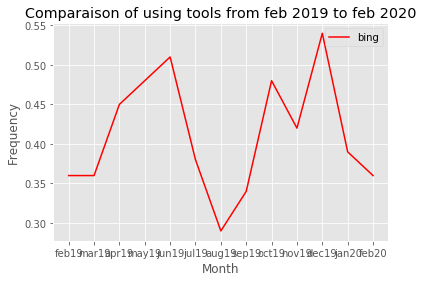

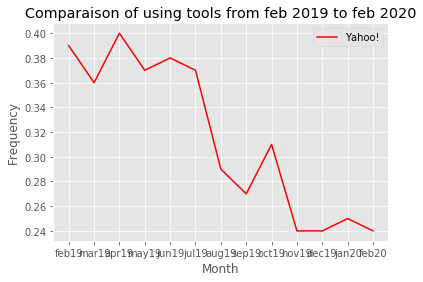

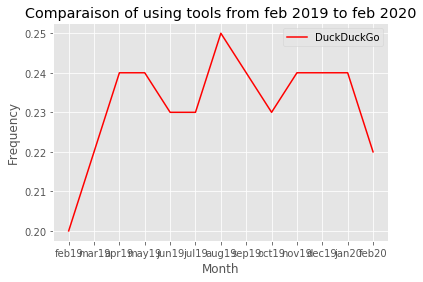

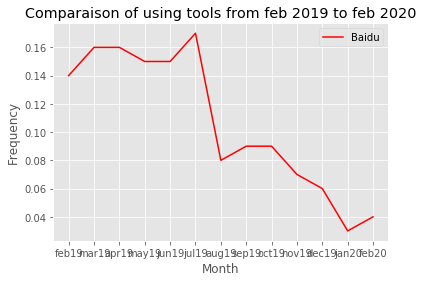

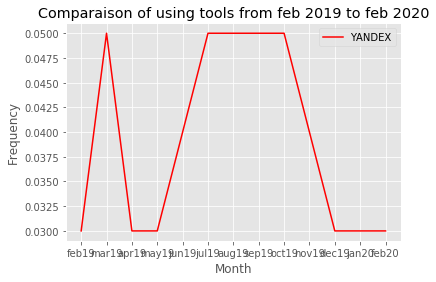

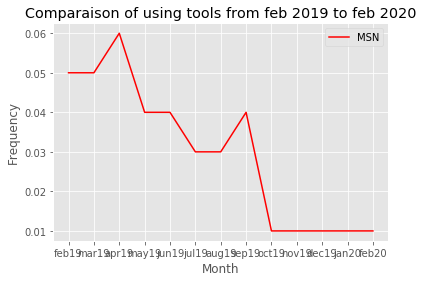

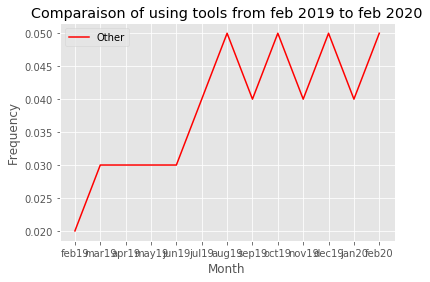

In [23]:
graph(col)

### 3_3 Построить гистограммы

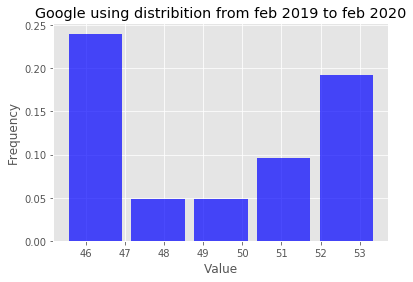

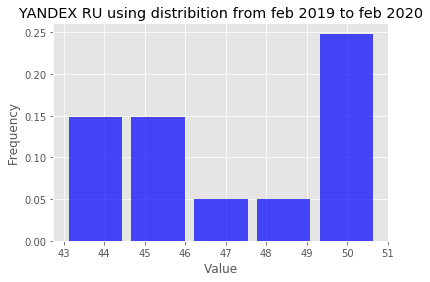

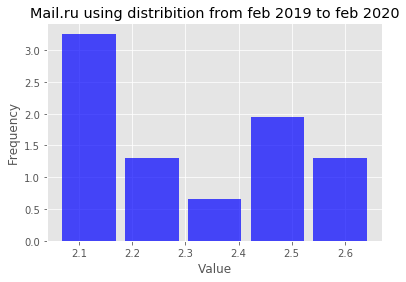

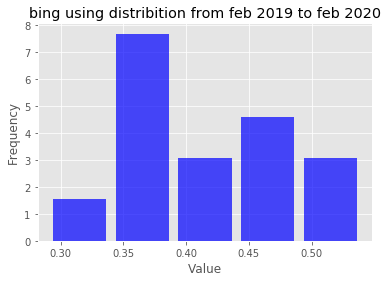

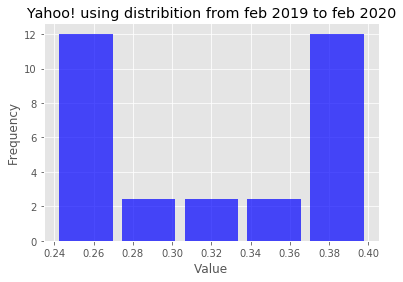

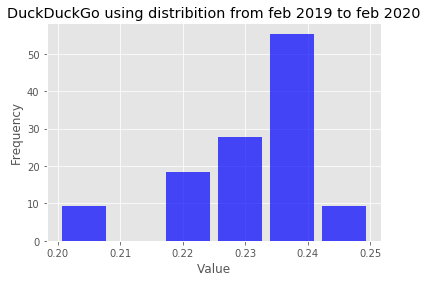

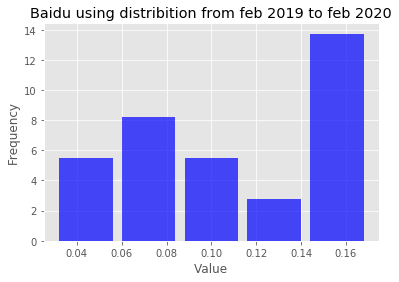

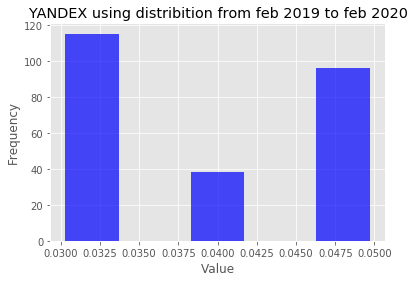

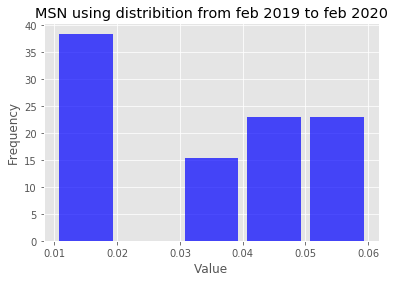

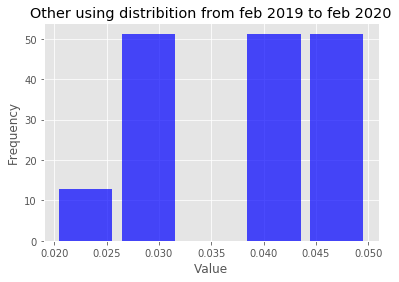

In [10]:
def histogramm(a) :
    for a in col :
        plt.style.use('ggplot')
        plt.hist(dataComp[a], bins='auto', color='blue',
                                    alpha=0.7, rwidth=0.85, density=True)
        plt.grid(axis='y', alpha=0.95)
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.title(a+ ' using distribition from feb 2019 to feb 2020')
        plt.show()
histogramm(col)

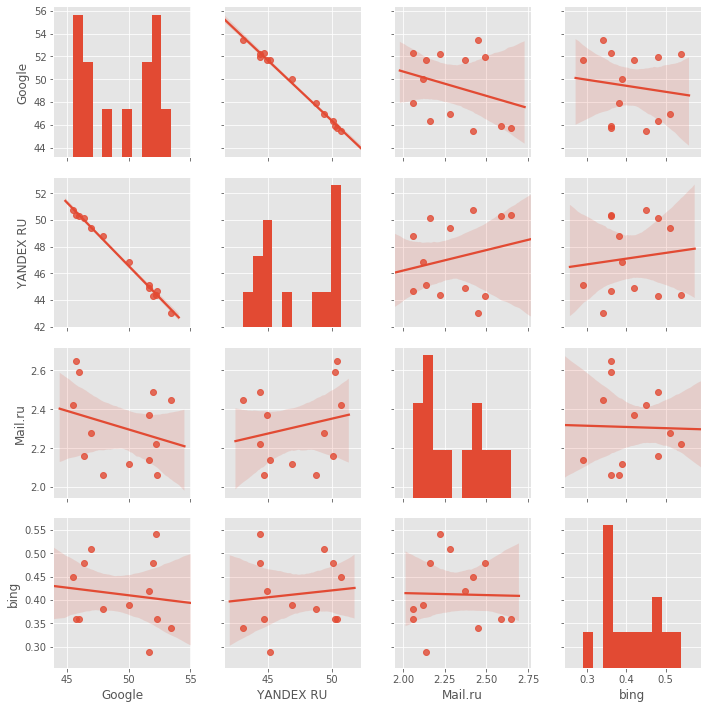

In [40]:
import seaborn
seaborn.pairplot(dataComp, vars=[col[0],col[1],col[2],col[3]],
                 kind='reg') # ,hue='Month'